<a href="https://colab.research.google.com/github/Swethaa-sri/Data_Science/blob/main/Chennai_House_Price_Prediction_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## reading csv file into dataframe
d = pd.read_csv('train-chennai-sale.csv')
d.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
## shape of dataframe d
d.shape

(7109, 22)

###### There 22 columns and 7109 rows.  
###### column PRT_ID is unique for each row, so we donot consider for sales price prediction 
###### columns 'REG_FEE' and	'COMMIS' donot contribute to sales price prediction, so we will drop those two columns.

In [4]:
## dropping PRT_ID, REG_FEE and COMMIS columns
d = d.drop(['PRT_ID','REG_FEE','COMMIS'], axis = 1)

In [5]:
## information of dataframe d
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  SALES_PR

###### 10 features are of object datatype.
###### 6 features are of int datatype.
###### 6 features are if float datatype.

In [6]:
## finding sum of null values for each feature
d.isna().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [7]:
## 1 null value in N_BEDROOM, 5 null values in N_BATHROOM and 48 null values are in QS_OVERALL 
## null values in N_BEDROOM and N_BATHROOM can be filled with mode as both columns are categorical while null values in QS_OVERALL with mean.

d['N_BEDROOM'].fillna(d['N_BEDROOM'].mode()[0], inplace=True)
d['N_BATHROOM'].fillna(d['N_BATHROOM'].mode()[0], inplace = True)
d['QS_OVERALL'].fillna(d['QS_OVERALL'].mean(), inplace =True)

In [8]:
d.isna().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

###### **No null values**

In [9]:
## converting dtype of N_BEDROOM, N_BATHROOM from float to int.
d['N_BATHROOM'] = d['N_BATHROOM'].astype('int')
d['N_BEDROOM'] = d['N_BEDROOM'].astype('int')

In [10]:
## Description of numerical variables
d.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1.373000e+03,1744.00,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,9.900000e+01,148.00,200.00
N_BEDROOM,7109.0,1.636939e+00,8.028806e-01,1.0,1.00,1.000000e+00,2.00,4.00
N_BATHROOM,7109.0,1.213110e+00,4.095336e-01,1.0,1.00,1.000000e+00,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.000000e+00,4.00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.500000e+00,4.30,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.500000e+00,4.30,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.500000e+00,4.30,5.00
QS_OVERALL,7109.0,3.503254e+00,5.254397e-01,2.0,3.13,3.503254e+00,3.88,4.97
SALES_PRICE,7109.0,1.089491e+07,3.768603e+06,2156875.0,8272100.00,1.033505e+07,12993900.00,23667340.00


#### **EDA Column wise**

##### **AREA**

In [11]:
# column area is a categorical. The unique values of column area
d.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

###### Many spelling mistakes are in unique values of area. Replacing with correct word.

In [12]:
d['AREA'] = d.AREA.replace('Karapakam', 'Karapakkam')
d['AREA'] = d.AREA.replace('Ann Nagar', 'Anna Nagar')
d['AREA'] = d.AREA.replace('Adyr', 'Adyar')
d['AREA'] = d.AREA.replace('Velchery', 'Velachery')
d['AREA'] = d.AREA.replace('Chrompet', 'Chromepet')
d['AREA'] = d.AREA.replace('Chrompt', 'Chromepet')
d['AREA'] = d.AREA.replace('Chrmpet', 'Chromepet')
d['AREA'] = d.AREA.replace('Chormpet', 'Chromepet')
d['AREA'] = d.AREA.replace('TNagar', 'T Nagar')
d['AREA'] = d.AREA.replace('Ana Nagar', 'Anna Nagar')
d['AREA'] = d.AREA.replace('KKNagar', 'KK Nagar')

In [13]:
d.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chromepet',
       'KK Nagar', 'T Nagar'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

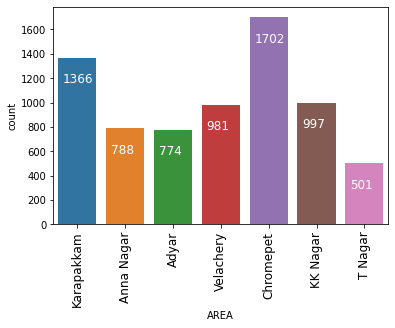

In [14]:
## AREA column is categorical. Count plot of AREA
import seaborn as sns

ax=sns.countplot(x=d['AREA'], data=d);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()), ha='left', va='top', color='white', size=12)
plt.xticks(rotation ='vertical',fontsize = 12)

##### Count of Houses is more in chromepet, followed by karapakkam and least in T Nagar.

In [15]:
result = d.groupby(["AREA"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
result

,AREA,SALES_PRICE
4,Karapakkam,7.340100e+06
0,Adyar,9.185668e+06
2,Chromepet,1.001381e+07
6,Velachery,1.104735e+07
3,KK Nagar,1.269623e+07
1,Anna Nagar,1.516820e+07
5,T Nagar,1.561674e+07


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

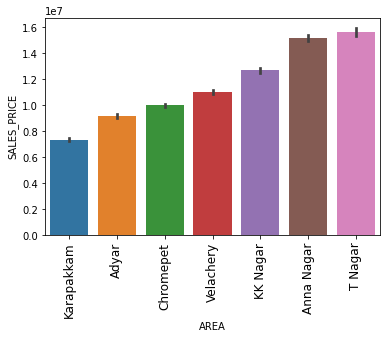

In [16]:
## AREA vs mean of SALES_PRICE
## As AREA is a categorical so bar plot is opted to know the distribution of AREA
#plt.figure(figsize=(10,6))
# make barplot and sort bars in descending order
result = d.groupby(["AREA"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
sns.barplot(x='AREA', y="SALES_PRICE", data=d, order=result['AREA'])
#plt.plot(result.AREA, result.SALES_PRICE)
plt.xticks(rotation ='vertical',fontsize = 12)

##### There is a **linear relationship** in AREA with respect to SALES_PRICE ==> Area is an **important feature.** 
#####  **Hence AREA can be label encoded.**

In [17]:
d['AREA'] = d['AREA'].map({'Karapakkam': 1 , 'Adyar' : 2, 'Chromepet' : 3, 'Velachery' : 4, 'KK Nagar' : 5, 'Anna Nagar' : 6, 'T Nagar' : 7})
d.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,1,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,6,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,2,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,4,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,1,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


##### **INT_SQFT**

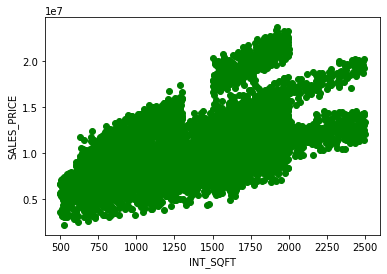

In [18]:
## using scatter plot we understand the distribution of INT_SQT with respect to SALES_PRICE.
#plt.figure(figsize=(10,6))
plt.scatter(d.INT_SQFT, d.SALES_PRICE, color = 'g')
plt.xlabel('INT_SQFT')
plt.ylabel('SALES_PRICE')
plt.show()

###### From the graph it is evident a linear relation between INT_SQFT and SALES_PRICE.

In [19]:
## Finding coefficient of correlation between INT_SQFT and SALES_PRICE
d[['INT_SQFT','SALES_PRICE']].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


###### 1) **coefficient of correlation** between INT_SQFT and SALES_PRICE is **0.612.**
###### 2) 0.6 > 0.2(0.2 is minimum value for linear correlation), Hence it is confirmed that INT_SQF and SALES_PRICE are **linearly correlated**.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


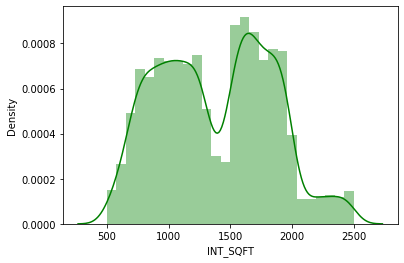

In [20]:
# distribution of feature
sns.distplot(d['INT_SQFT'], color = 'green')
plt.show()

###### **Bimodal distribution**

##### **AGE_HOUSE**

In [21]:
## considering only year for both columns DATE_SALE and DATE_BUILD 
## AGE_HOUSE is obtained by subtracting YEAR_BUILD from YEAR_SALE
d.DATE_SALE = pd.to_datetime(d.DATE_SALE)
d['YEAR_SALE'] = d.DATE_SALE.dt.year
d.drop(['DATE_SALE'], axis = 1, inplace = True)

d.DATE_BUILD = pd.to_datetime(d.DATE_BUILD)
d['YEAR_BUILD'] = d.DATE_BUILD.dt.year
d.drop(['DATE_BUILD'], axis = 1, inplace = True)

d['AGE_HOUSE'] = d['YEAR_SALE'] - d['YEAR_BUILD']
d.drop(['YEAR_SALE', 'YEAR_BUILD'], axis = 1, inplace = True)
d.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_HOUSE
0,1,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,6,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,2,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,4,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,1,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


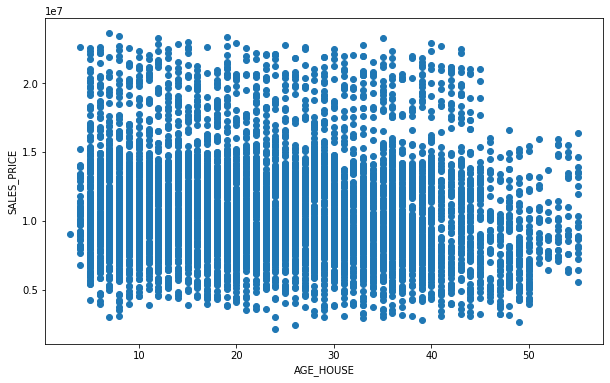

In [22]:
## AGE_HOUSE versus SALES_PRICE
plt.figure(figsize=(10,6))
plt.scatter(d.AGE_HOUSE, d.SALES_PRICE)
plt.xlabel('AGE_HOUSE')
plt.ylabel('SALES_PRICE')
plt.show()

##### Age of house above 45 years the maximum sales price is about 1 crore 50 lakhs.
##### Age of house below 45 years the maximum sales price is above 2 crores.

In [23]:
d[['AGE_HOUSE','SALES_PRICE']].corr()

,AGE_HOUSE,SALES_PRICE
AGE_HOUSE,1.000000,-0.118842
SALES_PRICE,-0.118842,1.000000


###### In general if correlation coefficient value is less than -0.2 then there is negative linear relationship.
###### There is no linear relationship between AGE_HOUSE and SALES_PRICE as the correlation coefficent is - 0.11 which is greater than -0.2.

##### **DIST_MAINROAD**

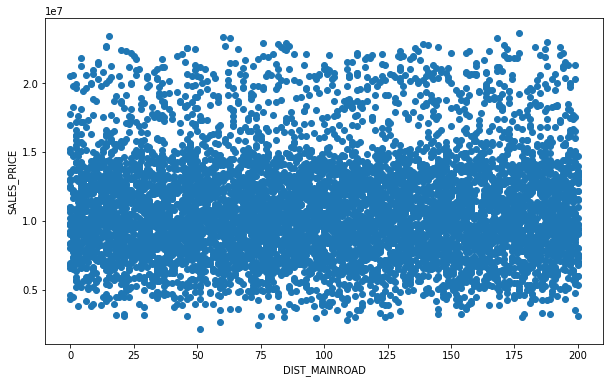

In [24]:
## DIST_MAINROAD vs SALES_PRICE
plt.figure(figsize=(10,6))
plt.scatter(d.DIST_MAINROAD, d.SALES_PRICE)
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALES_PRICE')
plt.show()

In [25]:
d[['DIST_MAINROAD','SALES_PRICE']].corr()

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


##### no linear relationship between DIST_MAINROAD and SALES_PRICE as correlation coefficent is less than 0.2 that is 0.018.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


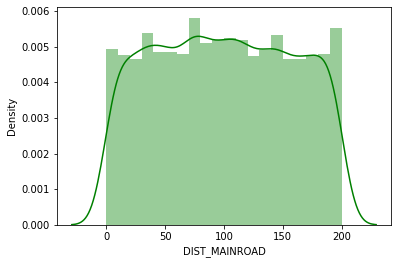

In [26]:
# distribution of feature
sns.distplot(d['DIST_MAINROAD'], color = 'green')

##### no bell curve

##### **N_BEDROOM**

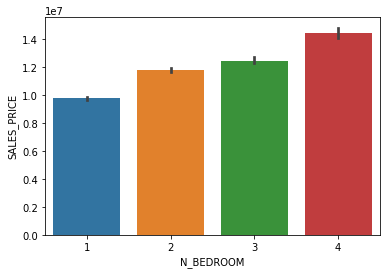

In [27]:
#plt.figure(figsize=(8,6))
sns.barplot(x = 'N_BEDROOM', y = 'SALES_PRICE', data = d)


###### It is evident from graph that there is a linear relationship between N_BEDROOM and SALES_PRICE.
##### As the N_BEDROOM increasing the SALES_PRICE is also increasing.

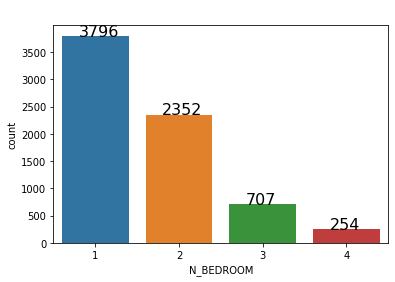

In [28]:
## count of N_BEDROOM
#plt.figure(figsize=(8,6))
ax=sns.countplot(x=d['N_BEDROOM'], data=d);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='baseline', color='black', size=16)


##### House with one bedroom are more in count.
##### House with four bedrooms are least in count.

###### **N_BATHROOM**

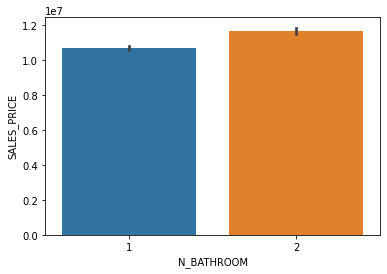

In [29]:
sns.barplot(x = 'N_BATHROOM', y = 'SALES_PRICE', data = d)

###### House with one bathroom price is relatively less when compared with House with two bathrooms.

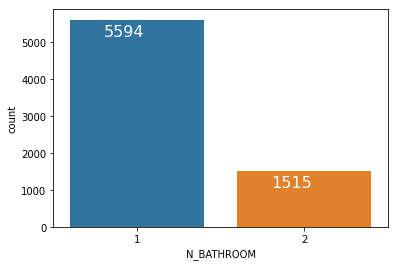

In [30]:
## count of N_BATHROOM

ax=sns.countplot(x=d['N_BATHROOM'], data=d);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='center_baseline', color='white', size=16)

##### Houses with one are more in number when compared to houses with 2 bathrooms.

##### **N_ROOM**


In [31]:
d.N_ROOM.unique()

array([3, 5, 4, 2, 6])

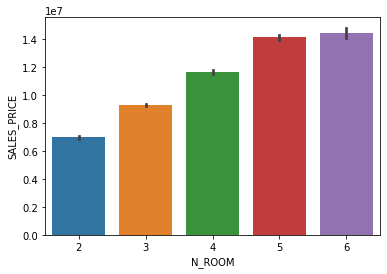

In [32]:
sns.barplot(x = 'N_ROOM', y = 'SALES_PRICE', data = d)

###### As the number of rooms increasing the SALES_PRICE is also increasing ==> **linear relation** between N_ROOM and SALES_PRICE.

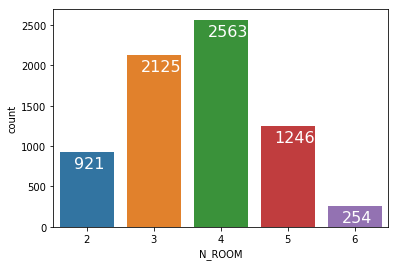

In [33]:
ax=sns.countplot(x=d['N_ROOM'], data=d);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='center_baseline', color='white', size=16)

##### Count of houses with 4 rooms is highest while count of houses with 6 rooms is lowest.

##### **SALE_COND**

In [34]:
d.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [35]:
## correcting the spelling mistakes
d['SALE_COND'] = d.SALE_COND.replace('AbNormal', 'Abnormal')
d['SALE_COND'] = d.SALE_COND.replace('Ab Normal', 'Abnormal')
d['SALE_COND'] = d.SALE_COND.replace('Partiall', 'Partial')
d['SALE_COND'] = d.SALE_COND.replace('PartiaLl', 'Partial')
d['SALE_COND'] = d.SALE_COND.replace('Adj Land', 'AdjLand')
d.SALE_COND.unique()

array(['Abnormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [36]:
d.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_HOUSE
0,1,1004,131,1,1,3,Abnormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,6,1986,26,2,1,5,Abnormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,2,909,70,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,4,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,1,1226,84,1,1,3,Abnormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


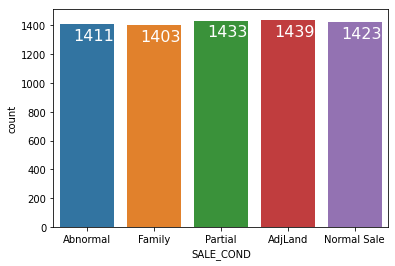

In [37]:
ax=sns.countplot(x=d['SALE_COND'], data=d);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='center_baseline', color='white', size=16)

##### slight variation

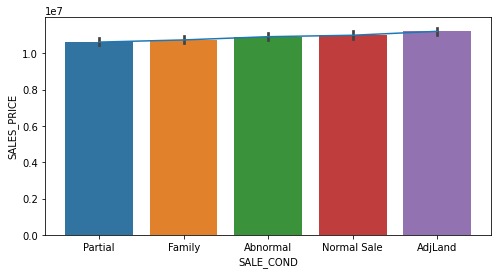

In [38]:
plt.figure(figsize=(8,4))
# make barplot and sort bars in descending order
result = d.groupby(["SALE_COND"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
sns.barplot(x='SALE_COND', y="SALES_PRICE", data=d, order=result['SALE_COND'])
plt.plot(result.SALE_COND, result.SALES_PRICE)

##### There is slight linear order in SALE_COND.
##### Hence label encoding can be done

In [39]:
##label encoding for SALE_COND
d['SALE_COND'] = d['SALE_COND'].map({'Partial': 1 , 'Family' : 2, 'Abnormal' : 4, 'Normal Sale' : 5, 'AdjLand' : 6})


In [40]:
d.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_HOUSE
0,1,1004,131,1,1,3,4,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,6,1986,26,2,1,5,4,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,2,909,70,1,1,3,4,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,4,1855,14,3,2,5,2,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,1,1226,84,1,1,3,4,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


##### **PARK_FACIL**

In [41]:
## Unique values of PARK_FACIL
d.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [42]:
## correcting spelling mistakes
d['PARK_FACIL'] = d['PARK_FACIL'].replace('Noo','No')

In [43]:
d['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

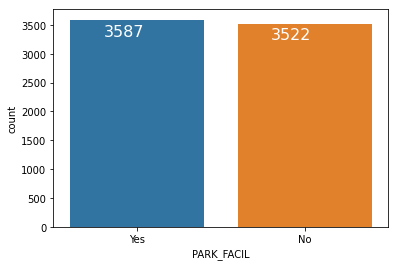

In [44]:
ax=sns.countplot(x=d['PARK_FACIL'], data=d);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='center_baseline', color='white', size=16)

##### Houses with parking facilities are slightly more than houses with no parking facilities.
##### As it is binary categorical label encoding can be done 

In [45]:
## label encoding
d['PARK_FACIL'] = d['PARK_FACIL'].map({'Yes': 0 , 'No' : 1})

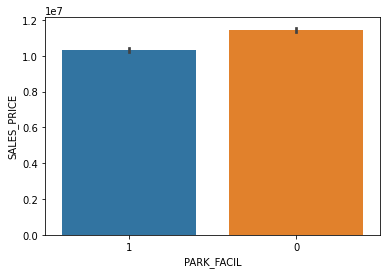

In [46]:
#plt.figure(figsize=(8,4))
result = d.groupby(["PARK_FACIL"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
sns.barplot(x='PARK_FACIL', y="SALES_PRICE", data=d, order=result['PARK_FACIL'])


###### Sales_price of houses with parking facility is more compared to houses with no parking facility.

##### **BUILDTYPE**

In [47]:
d.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [48]:
## correcting spelling mistakes
d['BUILDTYPE'] = d['BUILDTYPE'].replace('Other', 'Others')
d['BUILDTYPE'] = d['BUILDTYPE'].replace('Comercial', 'Commercial')

In [49]:
d.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

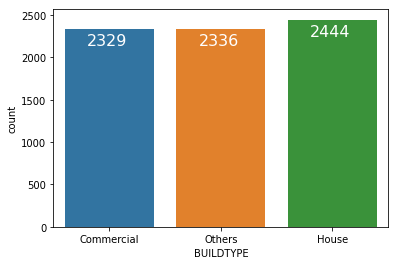

In [50]:
## count of BUILDTYPE
ax=sns.countplot(x=d['BUILDTYPE'], data=d);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='center_baseline', color='white', size=16)

###### count for House is more compared to others and commercial.

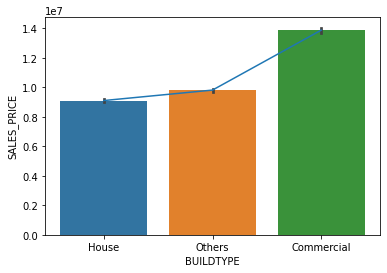

In [51]:
#plt.figure(figsize=(8,4))
# make barplot and sort bars in ascending order
result = d.groupby(["BUILDTYPE"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
sns.barplot(x='BUILDTYPE', y="SALES_PRICE", data=d, order=result['BUILDTYPE'])
plt.plot(result.BUILDTYPE, result.SALES_PRICE)

##### There is relationship between Buildtype and sales_price.
##### commercial types have more sales price than others and house types.
##### there is order in buildtypes but not linear type hence we go for one hot encoding.

In [52]:
d = pd.get_dummies(d, columns = ['BUILDTYPE'])
d.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_HOUSE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,4,0,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,6,1986,26,2,1,5,4,1,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,2,909,70,1,1,3,4,0,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,4,1855,14,3,2,5,2,1,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,1,1226,84,1,1,3,4,0,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30,0,0,1


##### **UTILITY_AVAIL**

In [53]:
d.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [54]:
d['UTILITY_AVAIL'] = d['UTILITY_AVAIL'].replace('AllPub' , 'All Pub')
d['UTILITY_AVAIL'] = d['UTILITY_AVAIL'].replace('NoSewr ', 'NoSeWa')
d.UTILITY_AVAIL.unique()

array(['All Pub', 'ELO', 'NoSeWa'], dtype=object)

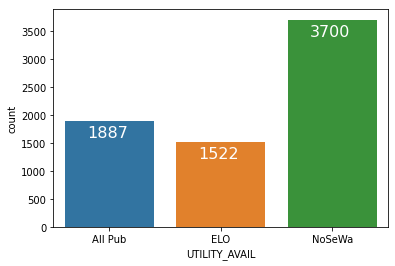

In [55]:
## count of UTILITY_AVAIL
ax=sns.countplot(x=d['UTILITY_AVAIL'], data=d);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='center_baseline', color='white', size=16)

##### count of houses with NoSeWa is more followed by All Pub followed by ELO.

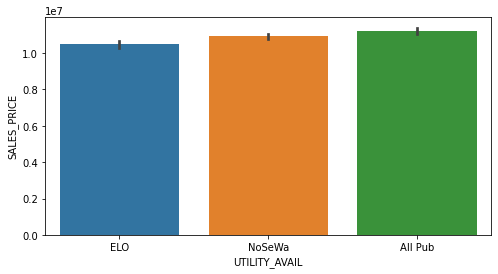

In [56]:
## UTILITY_AVAIL vs SALES_PRICE
plt.figure(figsize=(8,4))
# make barplot and sort bars in ascending order
result = d.groupby(["UTILITY_AVAIL"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
sns.barplot(x='UTILITY_AVAIL', y="SALES_PRICE", data=d, order=result['UTILITY_AVAIL'])

###### There is a relationship between UTILITY_AVAIL versus sales price ==> UTILITY_AVAIL is an important feature.
###### There is a linear relationship between UTILITY_AVAIL versus sales price ==> we can do label encoding.

In [57]:
## label encoding of UTILITY_AVAIL
d['UTILITY_AVAIL'] = d['UTILITY_AVAIL'].map({'ELO': 1 , 'NoSeWa' : 2, 'All Pub':3})


In [58]:
d.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_HOUSE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,4,0,3,Paved,A,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,6,1986,26,2,1,5,4,1,3,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,2,909,70,1,1,3,4,0,1,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,4,1855,14,3,2,5,2,1,2,Paved,I,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,1,1226,84,1,1,3,4,0,3,Gravel,C,3.0,2.5,4.1,3.290,7406250,30,0,0,1


##### **STREET**

In [59]:
d.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [60]:
## correcting spelling mistakes
d['STREET'] = d['STREET'].replace('Pavd', 'Paved')
d['STREET'] = d['STREET'].replace('NoAccess', 'No Access')

In [61]:
d.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

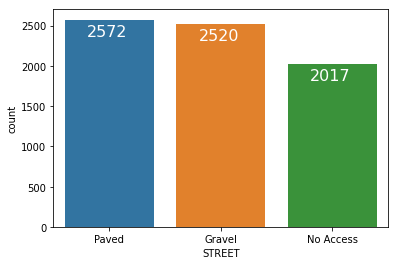

In [62]:
## count of street
ax=sns.countplot(x=d['STREET'], data=d);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='center_baseline', color='white', size=16)

###### Houses with paved street is more followed by gravel street followed by No access.

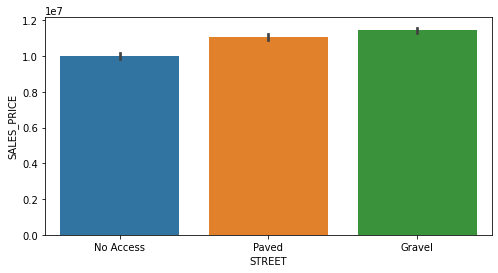

In [63]:
## STREET vs SALES_PRICE
plt.figure(figsize=(8,4))
# make barplot and sort bars in ascending order
result = d.groupby(["STREET"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
sns.barplot(x='STREET', y="SALES_PRICE", data=d, order=result['STREET'])

##### There is a linear relationshp between STREET versus SALES_PRICE ==> STREET is an important feature.
##### As there is linear relationship between STREET and SALES_PRICE ==> we can do label encoding.
##### Sales_price of houses with street type Gravel is more followed by paved followed by No Access. 

In [64]:
## label encoding of STREET
d['STREET'] = d['STREET'].map({'No Access': 1 , 'Paved' : 2, 'Gravel':3})
d.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_HOUSE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,4,0,3,2,A,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,6,1986,26,2,1,5,4,1,3,3,RH,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,2,909,70,1,1,3,4,0,1,3,RL,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,4,1855,14,3,2,5,2,1,2,2,I,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,1,1226,84,1,1,3,4,0,3,3,C,3.0,2.5,4.1,3.290,7406250,30,0,0,1


##### **MZZONE**

In [65]:
d.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

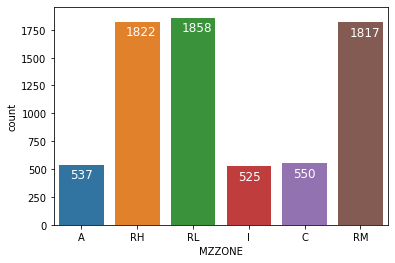

In [66]:
## count of MZZONE
ax=sns.countplot(x=d['MZZONE'], data=d);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='center_baseline', color='white', size=12)

###### around 1810 - 1860 houses are present in RL, RM, RH zones while 520 - 550 houses are present in A, C, I zones.

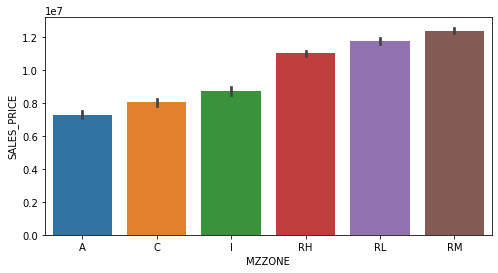

In [67]:
## MZZONE vs SALES_PRICE
plt.figure(figsize=(8,4))
# make barplot and sort bars in ascending order
result = d.groupby(["MZZONE"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
sns.barplot(x='MZZONE', y="SALES_PRICE", data=d, order=result['MZZONE'])

##### There is a linear relationshp between MZZONE versus SALES_PRICE ==> MZZONE is an important feature.
##### As there is linear relationship between MZZONE and SALES_PRICE ==> we can do label encoding.
##### Sales price for houses in zone A is least while Sales price for houses in zone RM is maximum.

In [68]:
## label encoding of MZZONE
d['MZZONE'] = d['MZZONE'].map({'A': 1 , 'C' : 2, 'I': 3, 'RH': 4, 'RL' : 5, 'RM' : 6})
d.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_HOUSE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,4,0,3,2,1,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,6,1986,26,2,1,5,4,1,3,3,4,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,2,909,70,1,1,3,4,0,1,3,5,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,4,1855,14,3,2,5,2,1,2,2,3,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,1,1226,84,1,1,3,4,0,3,3,2,3.0,2.5,4.1,3.290,7406250,30,0,0,1


##### **QS_ROOMS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


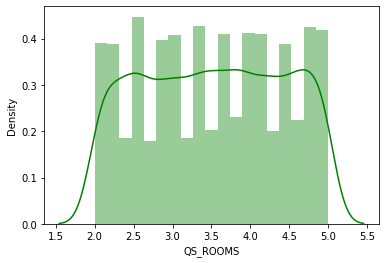

In [69]:
## continuous feature
## distribution of feature
sns.distplot(d['QS_ROOMS'], color = 'green')

##### no bell curve

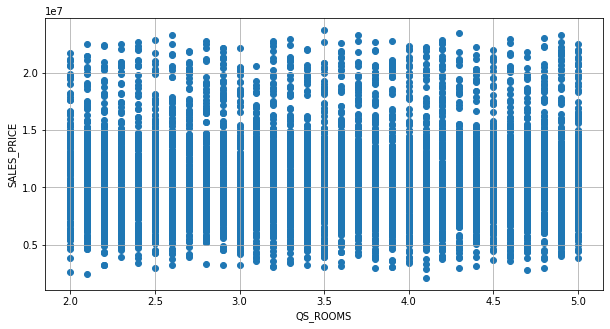

In [70]:
## QS_ROOMS versus SALES_PRICE
plt.figure(figsize=(10,5))
plt.scatter(d.QS_ROOMS, d.SALES_PRICE)
plt.xlabel('QS_ROOMS')
plt.ylabel('SALES_PRICE')
plt.grid(True)
plt.show()

In [71]:
d[['QS_ROOMS','SALES_PRICE']].corr()

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.021967
SALES_PRICE,0.021967,1.000000


###### It is evident from scatter plot(no pattern) and correlation coefficient(less than 0.2 i.e 0.0219) that there is no correlation.

##### **QS_BATHROOM**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


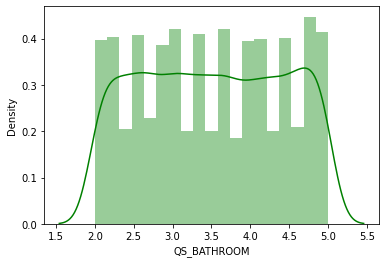

In [72]:
## continuous feature
## distribution of feature
sns.distplot(d['QS_BATHROOM'], color = 'green')

###### no bell curve

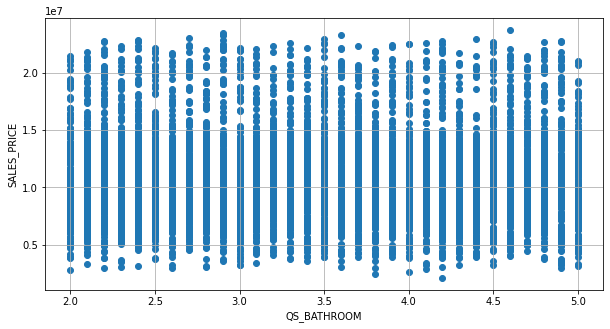

In [73]:
## QS_BATHROOM versus SALES_PRICE
plt.figure(figsize=(10,5))
plt.scatter(d.QS_BATHROOM, d.SALES_PRICE)
plt.xlabel('QS_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.grid(True)
plt.show()

In [74]:
## correlation
d[['QS_BATHROOM','SALES_PRICE']].corr()

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011377
SALES_PRICE,-0.011377,1.000000


###### It is evident from scatter plot(no pattern) and correlation coefficient(more than -0.2 i.e -0.011, normally for linear relationship it shoulde be less than -0.2) that there is no correlation.

##### **QS_BEDROOM**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


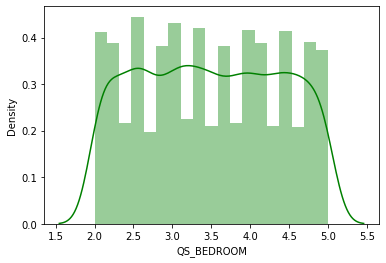

In [75]:
## continuous feature
## distribution of feature
sns.distplot(d['QS_BEDROOM'], color = 'green')

###### no bell curve

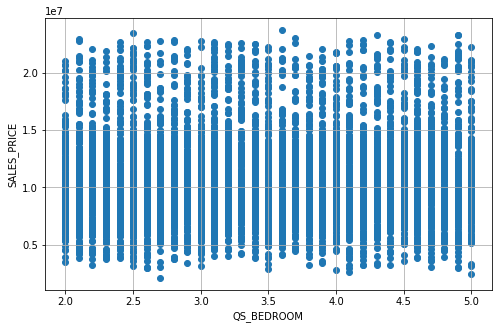

In [76]:
## QS_BEDROOM versus SALES_PRICE
plt.figure(figsize=(8,5))
plt.scatter(d.QS_BEDROOM, d.SALES_PRICE)
plt.xlabel('QS_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.grid(True)
plt.show()

##### no clear pattern

In [77]:
## correlation
d[['QS_BEDROOM','SALES_PRICE']].corr()

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.000000,0.018804
SALES_PRICE,0.018804,1.000000


###### It is evident from scatter plot(no pattern) and correlation coefficient(less than 0.2 i.e 0.018) that there is no correlation.

##### **QS_OVERALL**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


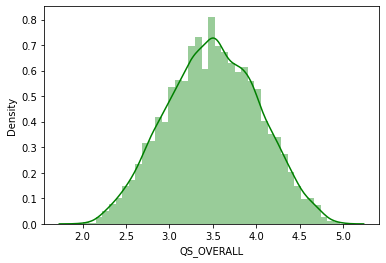

In [78]:
## continuous feature
## distribution of feature
sns.distplot(d['QS_OVERALL'], color = 'green')

###### bell curve ==> normal distribution

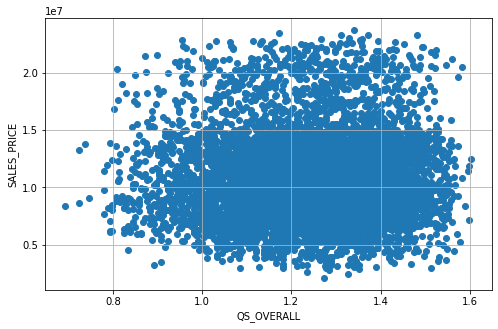

In [79]:
## QS_OVERALL versus SALES_PRICE
plt.figure(figsize=(8,5))
plt.scatter(np.log(d.QS_OVERALL), d.SALES_PRICE)
plt.xlabel('QS_OVERALL')
plt.ylabel('SALES_PRICE')
plt.grid(True)
plt.show()

In [80]:
d[['QS_OVERALL','SALES_PRICE']].corr()

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020485
SALES_PRICE,0.020485,1.000000


###### It is evident from scatter plot and correlation coefficent(0.02 which is very less than 0.2) that there no linear relationship between QS_OVERALL and SALES_PRICE. 

In [81]:
d.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_HOUSE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,4,0,3,2,1,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,6,1986,26,2,1,5,4,1,3,3,4,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,2,909,70,1,1,3,4,0,1,3,5,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,4,1855,14,3,2,5,2,1,2,2,3,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,1,1226,84,1,1,3,4,0,3,3,2,3.0,2.5,4.1,3.290,7406250,30,0,0,1


#### **Splitting the data into train and test**

In [82]:
X1 = d.drop(['SALES_PRICE'], axis = 1)
#n1 = X
X = X1.iloc[:,:].values

In [83]:
y = d[['SALES_PRICE']]
y = y.iloc[:,:].values

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## **Feature Scaling**

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
print(X_train)

[[ 1.32835104  1.20242408  1.09721481 ... -0.70680836  1.38834879
  -0.69431145]
 [ 1.32835104  0.53853945 -1.27604676 ... -0.70680836 -0.7202801
   1.44027583]
 [ 1.32835104  0.6826723   0.48644896 ...  1.41481065 -0.7202801
  -0.69431145]
 ...
 [ 0.78868945  1.54528555 -1.20624495 ... -0.70680836  1.38834879
  -0.69431145]
 [ 0.24902786  0.81806982  1.14956617 ...  1.41481065 -0.7202801
  -0.69431145]
 [ 0.78868945  0.1410822  -0.92703771 ...  1.41481065 -0.7202801
  -0.69431145]]


In [87]:
y_train

array([[13060780],
       [12837890],
       [17874820],
       ...,
       [11552700],
       [16882760],
       [12429860]])

#### **Cross validation for Linear Regressoin**

In [88]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [89]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = regressor , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 92.22 %
Standard Deviation: 0.43 %


###### Cross validation score for Linear Regression is 92.22%

#### **Cross validation for Support Vector Regression**

In [90]:
y = y.reshape(len(y),1)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [92]:
## feature scaling of X_train, X_test, y_train, y_test
from sklearn.preprocessing import StandardScaler
scaleX = StandardScaler().fit(X_train)
scaley = StandardScaler().fit(y_train)
X_train = scaleX.transform(X_train)
y_train = scaley.transform(y_train)
X_test = scaleX.transform(X_test)
y_test = scaley.transform(y_test)

In [93]:
y_train = np.ravel(y_train)
y_train.shape

(5331,)

In [94]:
from sklearn.svm import SVR
regressor_svr_linear = SVR(kernel = 'linear')

In [95]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = regressor_svr_linear , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 91.82 %
Standard Deviation: 0.47 %


###### Cross validation score for Support Vector Regression(kernel = linear) is 91.82%

In [96]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')

In [97]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = regressor_svr , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 98.09 %
Standard Deviation: 0.18 %


###### Cross validation score for Support Vector Regression(kernel = rbf) is 98.09%

**Cross validation for K Nearest Neighbors**

In [98]:
from sklearn.neighbors import KNeighborsRegressor
kn_regressor = KNeighborsRegressor()

In [99]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = kn_regressor , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 89.98 %
Standard Deviation: 0.92 %


Cross validation score for K Nearest Neighbors is 89.98%

#### **Cross validation for Decision Tree**

In [100]:
from sklearn.tree import DecisionTreeRegressor
regressor_tree = DecisionTreeRegressor(random_state = 0)

In [101]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = regressor_tree , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 96.31 %
Standard Deviation: 0.28 %


###### Cross validation score for DecisionTree Regression is 96.31%

#### **Cross validation for Random Forest**

In [102]:
from sklearn.ensemble import RandomForestRegressor
regressor_forest = RandomForestRegressor(n_estimators= 10, random_state = 0)

In [103]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = regressor_forest , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 98.15 %
Standard Deviation: 0.15 %


###### Cross validation score for Random Forest Regression is 98.15%

#### **Cross validation for XGBOOST**

In [104]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(objective ='reg:squarederror')

In [105]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = xg_reg , X = X_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 99.09 %
Standard Deviation: 0.10 %


###### Cross validation score for XGB Regression is **99.09%**




In [106]:
import pandas as pd

c = pd.DataFrame({'Regressor': ['Linear Regression', 'SVR - Linear', 'SVR - rbf', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
                  'Cross-validation Score (%)' : [92.22, 91.82, 98.09, 89.98, 96.31, 98.15, 99.09]})
c

,Regressor,Cross-validation Score (%)
0,Linear Regression,92.22
1,SVR - Linear,91.82
2,SVR - rbf,98.09
3,KNN,89.98
4,Decision Tree,96.31
5,Random Forest,98.15
6,XGBoost,99.09


Out of all cross validation scores for various regression models, XG Boost regression score is highest(99.09%).

We will choose XG Boost regression model and using this model will do feature selection.

#### **Prediction of Test set using XGBosst regression model**

In [107]:
xg_reg.fit(X_train, y_train)
pred = xg_reg.predict(X_test)

In [108]:
from sklearn.metrics import r2_score
r = r2_score(y_test, pred)
r

0.9923991929708145

###### R-squared value on **Test test** is **0.9923** which is very close to 1.
##### R-squared value is greater than cross validation score ==> no overfitting



###### **Feature selection**

In [109]:
## Feature selection using Select From Model 
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(xg_reg)
sel.fit(X_train, y_train)

SelectFromModel(estimator=XGBRegressor(objective='reg:squarederror'))

In [110]:
sel.get_support()

array([ True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False])

In [111]:
features = X1.columns[sel.get_support()]
features

Index(['AREA', 'INT_SQFT', 'N_ROOM', 'BUILDTYPE_Commercial'], dtype='object')

###### From select from model it is evident that **['AREA', 'INT_SQFT', 'N_ROOM', 'BUILDTYPE_Commercial']** are top **5** **important features for sales price prediction.**

In [112]:
## Feature selection using RFE
from sklearn.feature_selection import RFE
rfe = RFE(estimator= xg_reg , n_features_to_select= 10)
# fit RFE
rfe.fit(X_train , y_train)
# summarize all features
s = []
for i in range(X_train.shape[1]):
  if rfe.support_[i] == True:
    s.append(i)
    print('Column: %s, Selected=%s, Rank: %d' % (X1.columns[i], rfe.support_[i], rfe.ranking_[i]))
print(s)

Column: AREA, Selected=True, Rank: 1
Column: INT_SQFT, Selected=True, Rank: 1
Column: N_ROOM, Selected=True, Rank: 1
Column: SALE_COND, Selected=True, Rank: 1
Column: PARK_FACIL, Selected=True, Rank: 1
Column: STREET, Selected=True, Rank: 1
Column: MZZONE, Selected=True, Rank: 1
Column: AGE_HOUSE, Selected=True, Rank: 1
Column: BUILDTYPE_Commercial, Selected=True, Rank: 1
Column: BUILDTYPE_House, Selected=True, Rank: 1
[0, 1, 5, 6, 7, 9, 10, 15, 16, 17]


In [113]:
s2 = X1.iloc[:,[0, 1, 5, 6, 7, 9, 10, 15, 16, 17]]
s2.head()

,AREA,INT_SQFT,N_ROOM,SALE_COND,PARK_FACIL,STREET,MZZONE,AGE_HOUSE,BUILDTYPE_Commercial,BUILDTYPE_House
0,1,1004,3,4,0,2,1,44,1,0
1,6,1986,5,4,1,3,4,11,1,0
2,2,909,3,4,0,3,5,20,1,0
3,4,1855,5,2,1,2,3,22,0,0
4,1,1226,3,4,0,3,2,30,0,0


###### The s dataframe contains the top 10 important features for sales price prediction.

In [114]:
## we will perform cross validation with the dataset using xg boost regression model.
S = s2.iloc[:,:].values
y = d[['SALES_PRICE']].values

In [115]:
y 

array([[ 7600000],
       [21717770],
       [13159200],
       ...,
       [ 8351410],
       [ 8507000],
       [ 9976480]])

In [116]:
from sklearn.model_selection import train_test_split
s_train, s_test, y_train, y_test = train_test_split(S, y, test_size = 0.25, random_state = 0)

In [117]:
from sklearn.preprocessing import StandardScaler
scaleX = StandardScaler().fit(s_train)
scaley = StandardScaler().fit(y_train)
s_train = scaleX.transform(s_train)
y_train = scaley.transform(y_train)
s_test = scaleX.transform(s_test)
y_test = scaley.transform(y_test)

In [118]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = xg_reg , X = s_train , y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 99.09 %
Standard Deviation: 0.08 %


###### With the selected features dataset 's' gives the cross validation score with xgboost regression. => **99.09%**.


###### **Prediction of Test set [of selected features]**

In [119]:
xg_reg.fit(s_train, y_train)
pred = xg_reg.predict(s_test)

In [120]:
from sklearn.metrics import r2_score
r = r2_score(y_test, pred)
r

0.9920998434707545

###### R-squared of test set is 0.9920 ==> 99.20% .
Thus with this model predicts the sales price of test set [of selected features] **99.20%** accurately.

#### **Hyperparameter Tuning**

In [121]:
param = {'learning_rate' : [0.05, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.25, 0.30, 0.5, 0.7, 1],
         'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
         'min_child_weight' : [1,2,3,4,5,6,7],
         'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6],
         'colsample_bytree' : [0.3, 0.4, 0.5, 0.6, 0.7]}

In [122]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor
xg_reg = XGBRegressor(objective ='reg:squarederror')
#xg_reg = XGBRegressor()
random_search = RandomizedSearchCV(xg_reg, param_distributions = param, n_iter = 5, scoring = 'r2', n_jobs = -1, cv = 10)
random_search.fit(s_train, y_train)

RandomizedSearchCV(cv=10, estimator=XGBRegressor(objective='reg:squarederror'),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                                        'learning_rate': [0.05, 0.1, 0.11, 0.12,
                                                          0.13, 0.14, 0.15, 0.2,
                                                          0.25, 0.3, 0.5, 0.7,
                                                          1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7]},
                   scoring='r2')

In [123]:
random_search.best_estimator_

XGBRegressor(colsample_bytree=0.4, gamma=0.3, learning_rate=0.11, max_depth=6,
             min_child_weight=3, objective='reg:squarederror')

In [124]:
r_g = XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.11, max_depth=9,
              min_child_weight=5, objective='reg:squarederror') # s_train

In [125]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator = r_g , X = s_train, y = y_train, cv = 10)
print("score: {:.2f} %".format(score.mean()*100))
print("Standard Deviation: {:.2f} %".format(score.std()*100))

score: 99.33 %
Standard Deviation: 0.04 %


In [126]:
r_g.fit(s_train, y_train)
pred = r_g.predict(s_test)

In [127]:
from sklearn.metrics import r2_score
r = r2_score(y_test, pred)
r

0.9937644011176919

##### The R-squared value is **0.9937** which is very close to 1 ==> 100% of variance can be explained.
##### This **XGBoost Regression** model predicts the **house price in chennai** **99.37%** accurately. 

In [128]:
pred = pred.reshape(-1,1)
pred = scaley.inverse_transform(pred)
y_test = scaley.inverse_transform(y_test)
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))

[[13887336. 13376150.]
 [12810871. 12857440.]
 [18745194. 19124310.]
 ...
 [21286524. 22499190.]
 [ 6779130.  6789000.]
 [ 7576473.  7726750.]]


In [129]:
pd.set_option('display.float_format', '{:.0f}'.format)
f = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1), pred.reshape(len(pred),1)),1), columns = ['y_test','pred'])
f.head()

,y_test,pred
0,13376150,13887336
1,12857440,12810871
2,19124310,18745194
3,4905000,4828604
4,13534450,13898234


###### **Minimum and Maximum range of predicted values.**

In [130]:
f['pred'].std()

3593887.617991375

In [131]:
f['min_range'] = f['pred'] - f['pred'].std()
f['max_range'] = f['pred'] + f['pred'].std()
f.head()

,y_test,pred,min_range,max_range
0,13376150,13887336,10293448,17481224
1,12857440,12810871,9216983,16404759
2,19124310,18745194,15151306,22339082
3,4905000,4828604,1234717,8422492
4,13534450,13898234,10304346,17492122


###### With the help of this range buyer can negotiate a best price with the builder for the house.

In [132]:
s2.columns

Index(['AREA', 'INT_SQFT', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'STREET',
       'MZZONE', 'AGE_HOUSE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House'],
      dtype='object')

##### **To get best price for house the builder should focus on these features while constructing houses in chennai.** ==> **['AREA',  'INT_SQFT',  'N_ROOM',  'SALE_COND',  'PARK_FACIL',  'STREET', 'MZZONE',  'AGE_HOUSE',     'BUILDTYPE_Commercial',  'BUILDTYPE_House']**












